# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

#C:\Users\Artur\Desktop\jupyter\Ebac\cientista_dados\redução de dimensionalidade - PCA\UCI HAR Dataset
filename_features = "../redução de dimensionalidade - PCA/UCI HAR Dataset/features.txt"
filename_labels = "../redução de dimensionalidade - PCA/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../redução de dimensionalidade - PCA/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../redução de dimensionalidade - PCA/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../redução de dimensionalidade - PCA/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../redução de dimensionalidade - PCA/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../redução de dimensionalidade - PCA/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../redução de dimensionalidade - PCA/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Artur\AppData\Local\Temp\ipykernel_17744\1071321542.py:29: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Artur\AppData\Local\Temp\ipykernel_17744\1071321542.py:32: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Artur\AppData\Local\Temp\ipykernel_17744\1071321542.py:36: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

### Dividindo a base em treino, validação e teste

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.25)

In [18]:
%%time

clf = DecisionTreeClassifier(ccp_alpha=0.001, random_state=1234).fit(X_train, y_train)

print(f'Acurácia da melhor árvore na base de treino:    {clf.score(X_train, y_train)}')
print(f'Acurácia da melhor árvore na base de validação: {clf.score(X_valid, y_valid)}')
print(f'Acurácia da melhor árvore na base de teste:     {clf.score(X_test, y_test)}')

Acurácia da melhor árvore na base de treino:    0.9756982227058397
Acurácia da melhor árvore na base de validação: 0.9445048966267682
Acurácia da melhor árvore na base de teste:     0.8486596538853071
CPU times: total: 4.02 s
Wall time: 4.01 s


Podemos observar uma acurácia na base Treino alta e que cai consideravelmente na base teste, isso pode ser uma indicação de overfitting.

## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [19]:
%%time
prcomp = PCA(n_components=1).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_valida = prcomp.transform(X_valid)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

CPU times: total: 719 ms
Wall time: 211 ms


(5514, 1)

Vamos agora selecionar somente as n = 1 componentes principais.

In [20]:
n=1

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_valid = pd.DataFrame(pc_valida[:,:n], columns = colunas)
pc_test  = pd.DataFrame( pc_teste[:,:n], columns = colunas)

pc_train.head()

,cp1
0,-6.028964
1,-3.909071
2,-6.424982
3,10.308980
4,-5.324686


Vamos treinar o modelo e fazer o tunning dele da mesma forma

In [21]:
%%time

clf = DecisionTreeClassifier(ccp_alpha=0.001, random_state=1234).fit(pc_train, y_train)

print(f'Acurácia da melhor árvore na base de treino:    {clf.score(pc_train, y_train)}')
print(f'Acurácia da melhor árvore na base de validação: {clf.score(pc_valid, y_valid)}')
print(f'Acurácia da melhor árvore na base de teste:     {clf.score(pc_test, y_test)}')

Acurácia da melhor árvore na base de treino:    0.4969169387014871
Acurácia da melhor árvore na base de validação: 0.500544069640914
Acurácia da melhor árvore na base de teste:     0.44316253817441464
CPU times: total: 250 ms
Wall time: 55.8 ms


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [22]:
%%time
# Construindo o modelo com PCA
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)

CPU times: total: 2.03 s
Wall time: 582 ms


In [23]:
X_train.shape, pc_train.shape, pc_treino.shape,y_train.shape

((5514, 561), (5514, 1), (5514, 561), (5514, 1))

In [24]:
%%time

# Usando um laço de repetição para selecionar o número de componentes principais
lista = [1, 2, 5, 10, 50]
score_train = []
score_test = []

for n in lista:
    colunas = ['cp'+str(x+1) for x in list(range(n))]

    pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
    pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001).fit(pc_train, y_train) # Treinando o modelo

    s_tr = clf.score(pc_train, y_train) # Acrescentando o valor da acurácia de treino na lista score_train
    score_train.append(s_tr)

    s_te = clf.score(pc_test, y_test) # Acrescentando o valor da acurácia de teste na lista score_test
    score_test.append(s_te)

CPU times: total: 922 ms
Wall time: 720 ms


In [25]:
df = pd.DataFrame({'qtd_componentes': lista, 'score_treino': score_train, 'score_teste': score_test})
df

,qtd_componentes,score_treino,score_teste
0,1,0.496917,0.443163
1,2,0.614436,0.559552
2,5,0.856003,0.779776
3,10,0.902067,0.795724
4,50,0.931447,0.803190


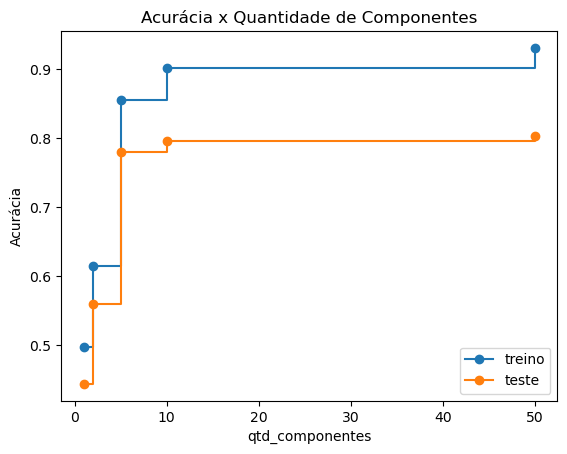

In [26]:
# Gráfico Acurácia x Qtd de componentes
fig, ax = plt.subplots()
ax.set_xlabel("qtd_componentes")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Quantidade de Componentes")
ax.plot(df['qtd_componentes'], df['score_treino'], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(df['qtd_componentes'], df['score_teste'], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

## Conclusão

Inicialmente, quando aumentamos o número de componentes em nosso modelo, observamos um aumento significativo na acurácia tanto na base de testes quanto na base de treino. No entanto, ao atingir cerca de 10 componentes, notamos que a acurácia de teste começa a se estabilizar enquanto a acurácia de treino continua a aumentar.

Isso nos indica que não é necessário usar um grande número de componentes para obter uma boa acurácia de teste. Entretanto, também não é recomendado utilizar muito poucos componentes, pois isso pode prejudicar o desempenho do modelo.